In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')
df = pd.read_csv('../data/database.csv.bz2')
df.shape

(54540, 20)

In [2]:
meaned = df.groupby(['beaconTimescale','time']).mean().reset_index().iloc[:,[0,1,3,4,6]]
meaned.shape

(909, 5)

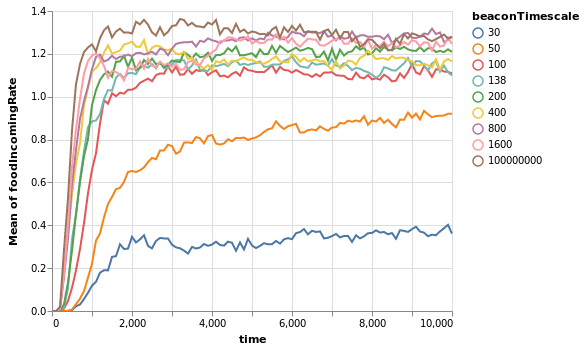

In [3]:
alt.Chart(meaned).mark_line().encode(
    x='time',
    y='mean(foodIncomingRate)',
    color='beaconTimescale:N')

In [4]:
 df1 = df[['beaconTimescale','foundFood', 'foundHome', 'beaconRem', 'exploration', 'startExploration','beaconMov', 'followPh', 'beaconDep', 'wanderPh', 'randomMove']]

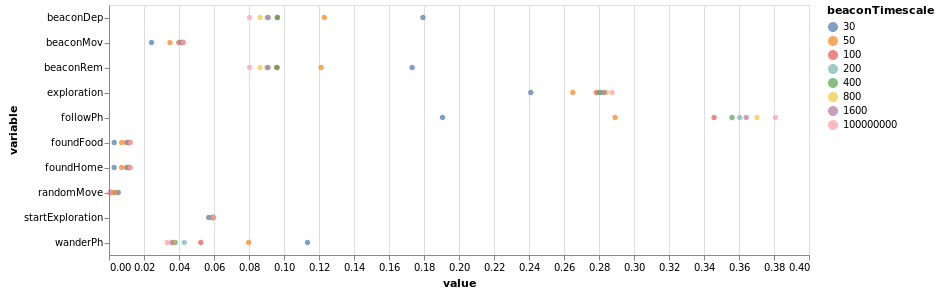

In [13]:

df2 = df1.groupby(['beaconTimescale']).mean().reset_index().melt(['beaconTimescale'])
df2 =df2[df2.beaconTimescale != 138]
c1 = alt.Chart(df2).mark_circle().encode(
    y = 'variable',
    x = 'value',
    color = 'beaconTimescale:N').properties(
    height=250,
    width=700)


df3 = df[['foodIncomingRate','foundFood', 'foundHome', 'beaconRem', 'exploration', 'startExploration','beaconMov', 'followPh', 'beaconDep', 'wanderPh', 'randomMove']]
c2 = alt.Chart(df3.groupby('foodIncomingRate').mean().reset_index().melt('foodIncomingRate')).mark_point().encode(
    x = 'variable',
    y = 'value',
    color = 'foodIncomingRate').configure_legend(gradientStrokeColor='0x00ff00',gradientWidth=40)
c1


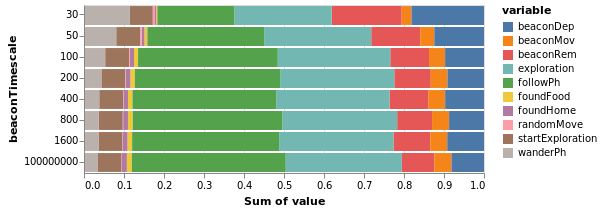

In [18]:
alt.Chart(df2).mark_bar().encode(
    x=alt.X('sum(value)', stack="normalize"),
    y='beaconTimescale:N',
    color='variable'
)